In [69]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", color_codes=True)

iris = pd.read_csv("iris.csv")
print(iris.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

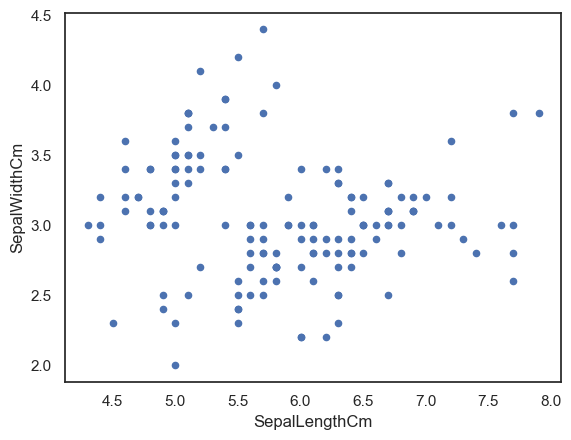

In [11]:
#Scatter plot
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')


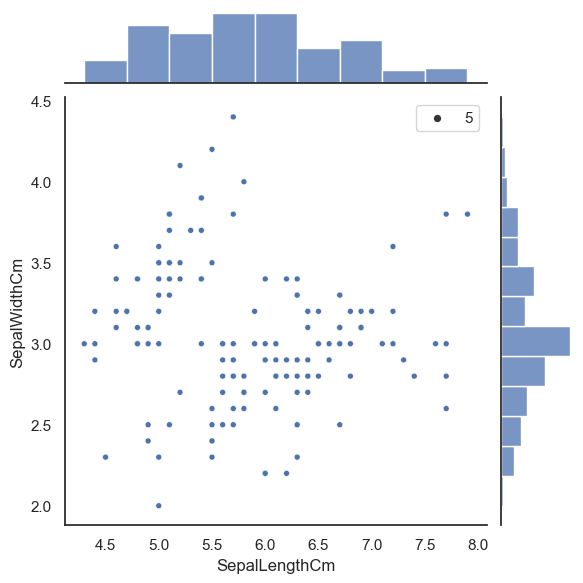

In [16]:
# Joint plot shows bivariate  scatter plots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, size=5)

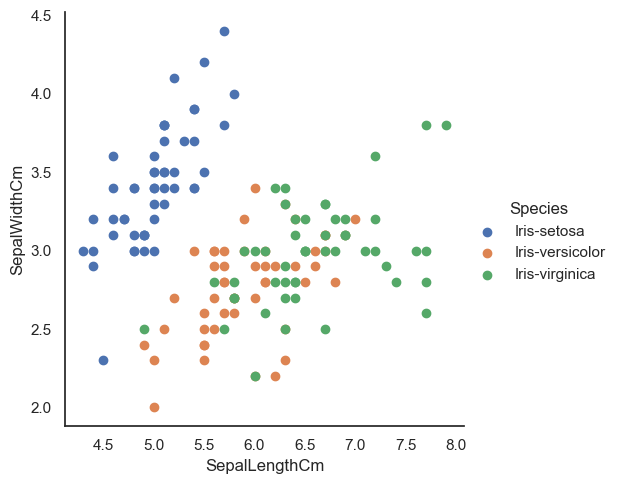

In [22]:
# FacetGrid allows to draw multiple instances of the same plot on different subsets of the dataset
# used for scatter plot by species

sns.FacetGrid(iris, hue="Species", height=5 ) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

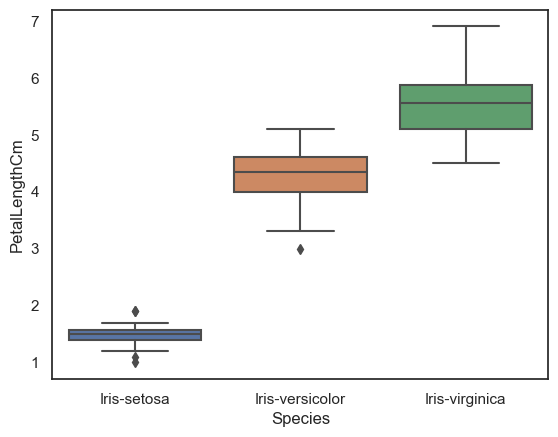

In [23]:
# box plot for individual feature in the dataset
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

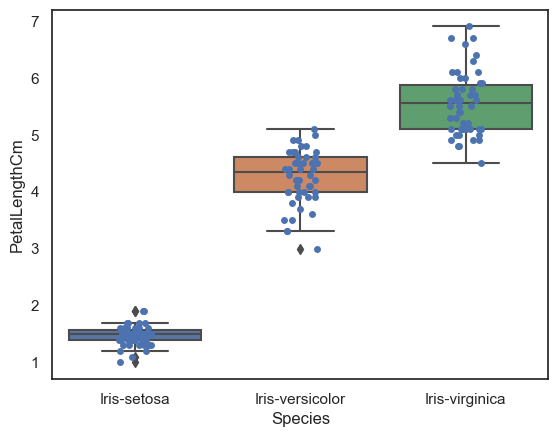

In [28]:
# Adding layer of individual points on top of box plot
# Strip plot is used to show the distribution of observations on the top of box plot of individual data set
# jitter=True is used to add some noise to the data so that it is easier to see the distribution of the data points
# saving the results in the variable ax to use it later
ax = sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
ax = sns.stripplot(x='Species', y='PetalLengthCm', data=iris, jitter=True)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

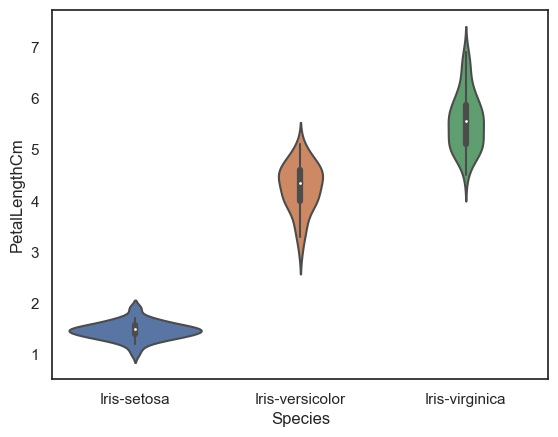

In [31]:
# Violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot
sns.violinplot(x='Species', y='PetalLengthCm', data=iris, size=6)

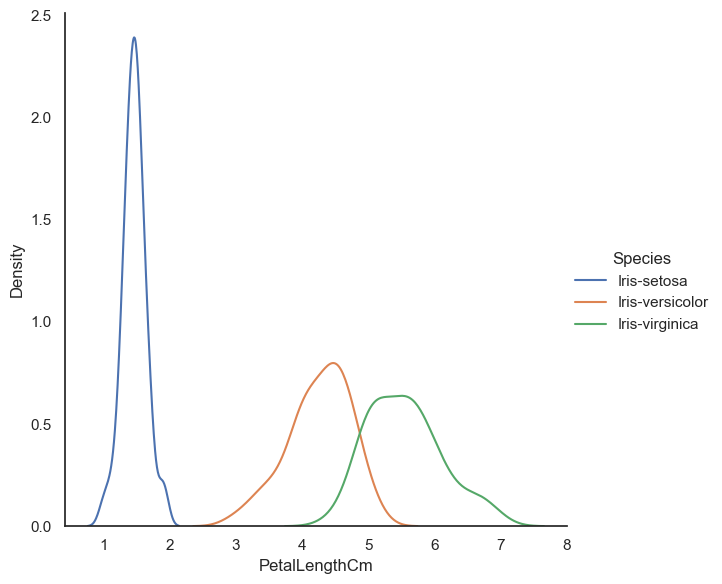

In [38]:
# Final seaborn plot used for looking univariate relations is the kdeplot, which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", height=6) \
    .map(sns.kdeplot, "PetalLengthCm") \
    .add_legend()

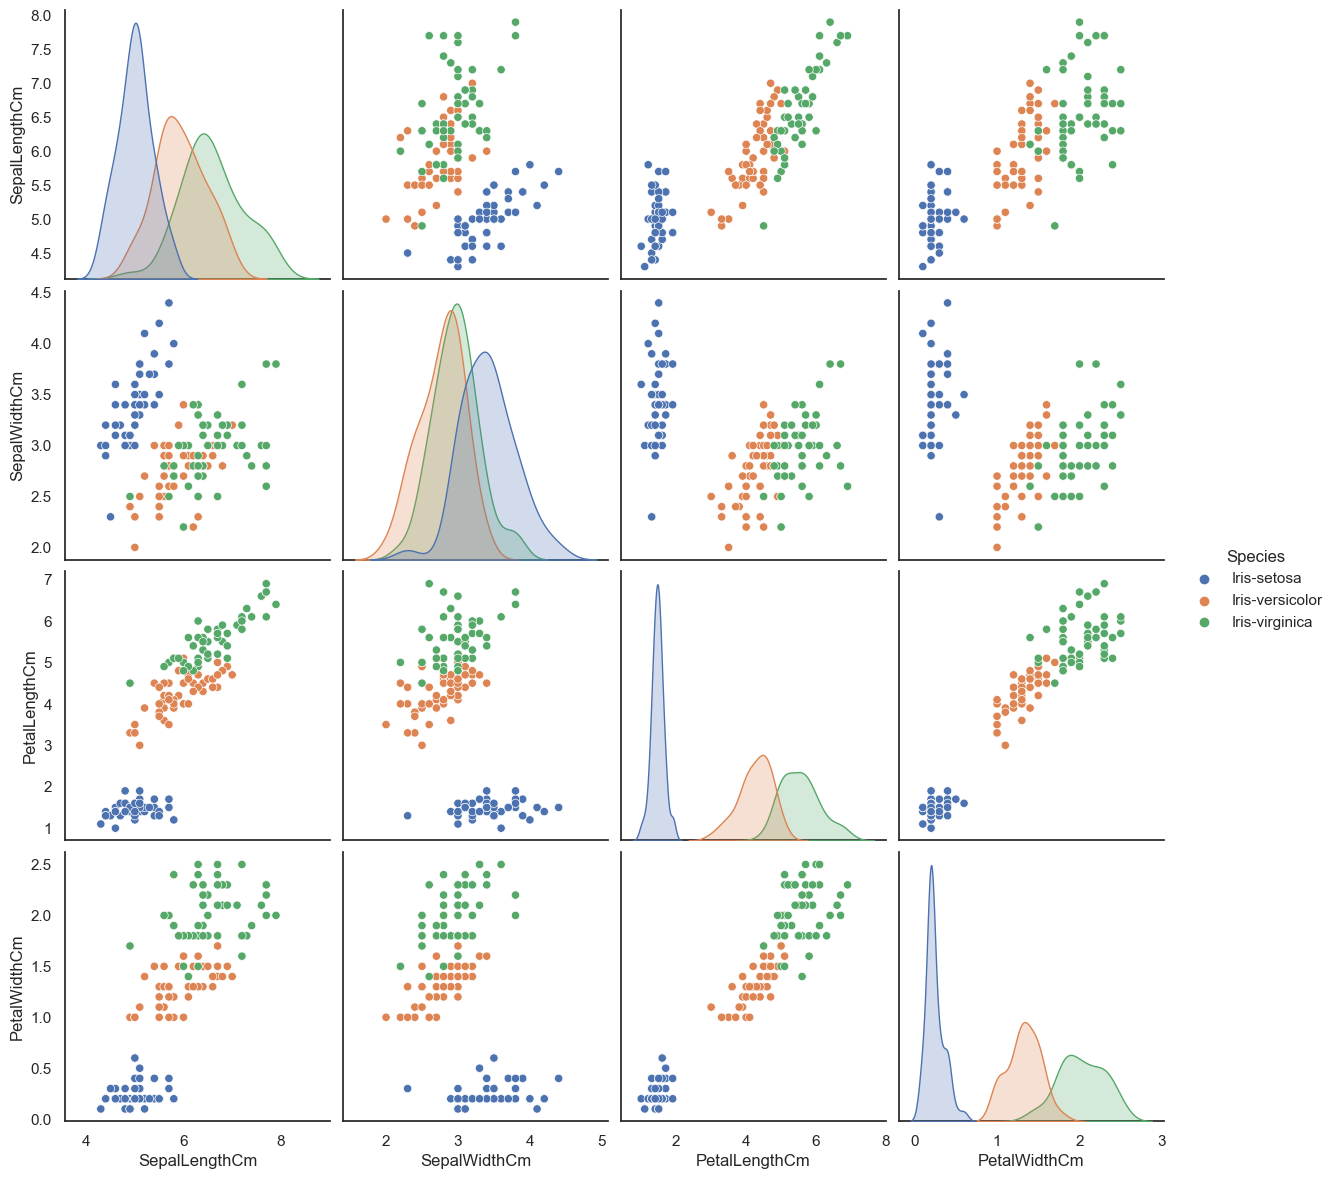

In [40]:
# Pair plot is used to visualize the relationship between each variable in the dataset
# It creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)


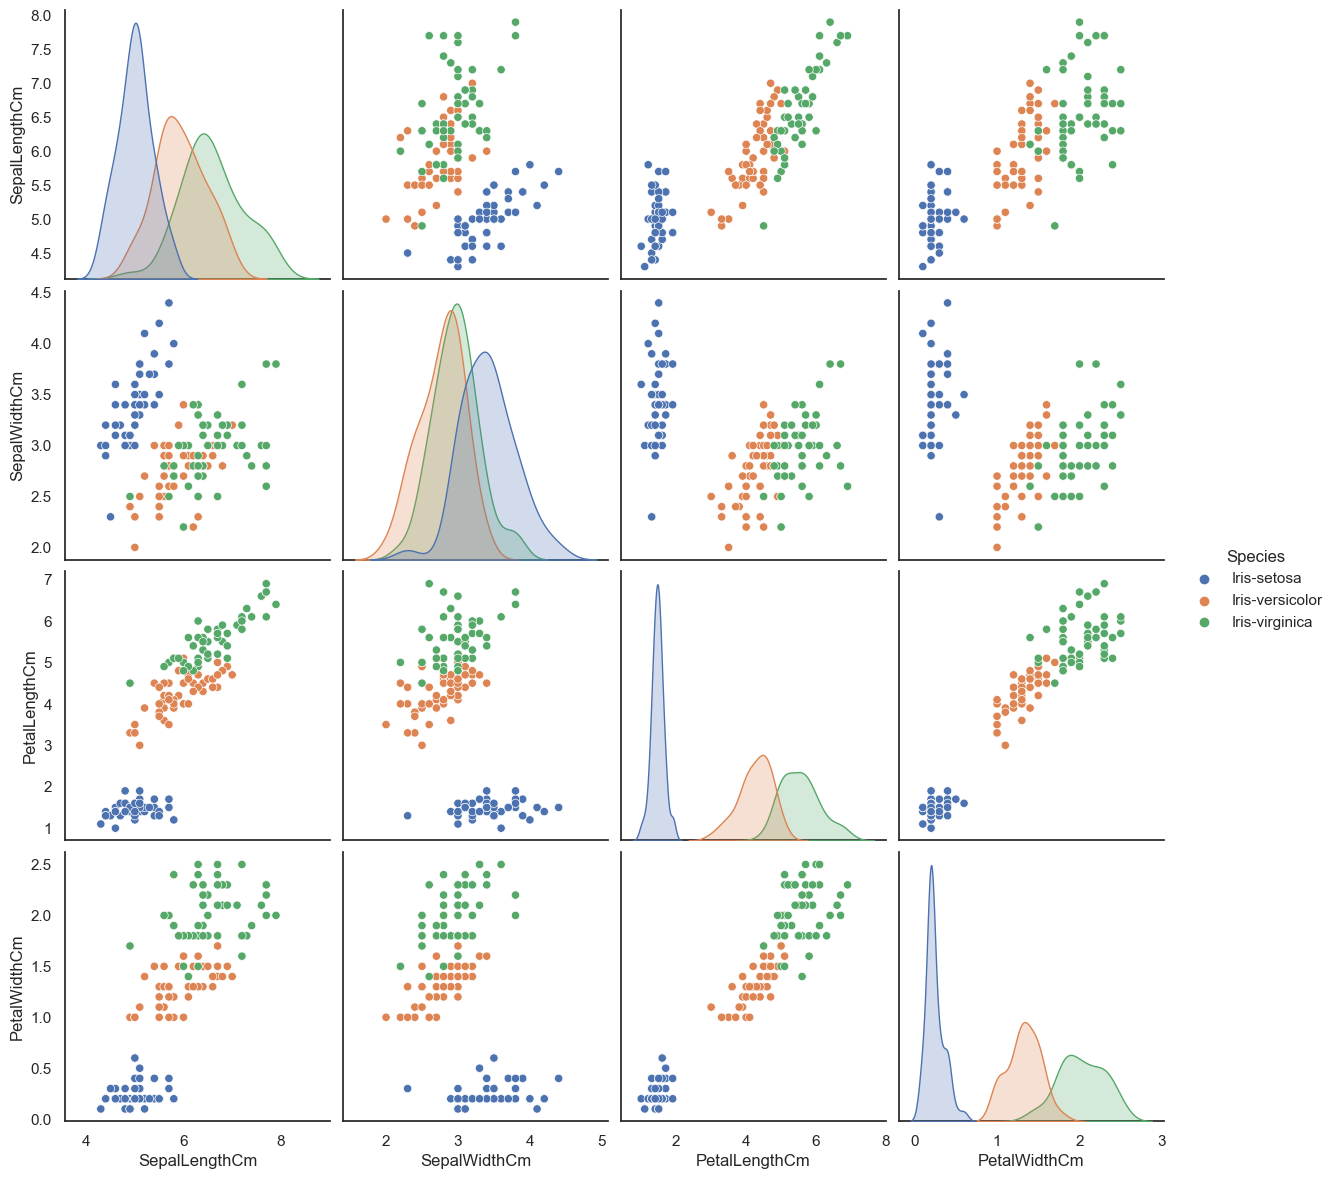

In [41]:
# The diagonal elements is a pair plot show the histogram by default
# we can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

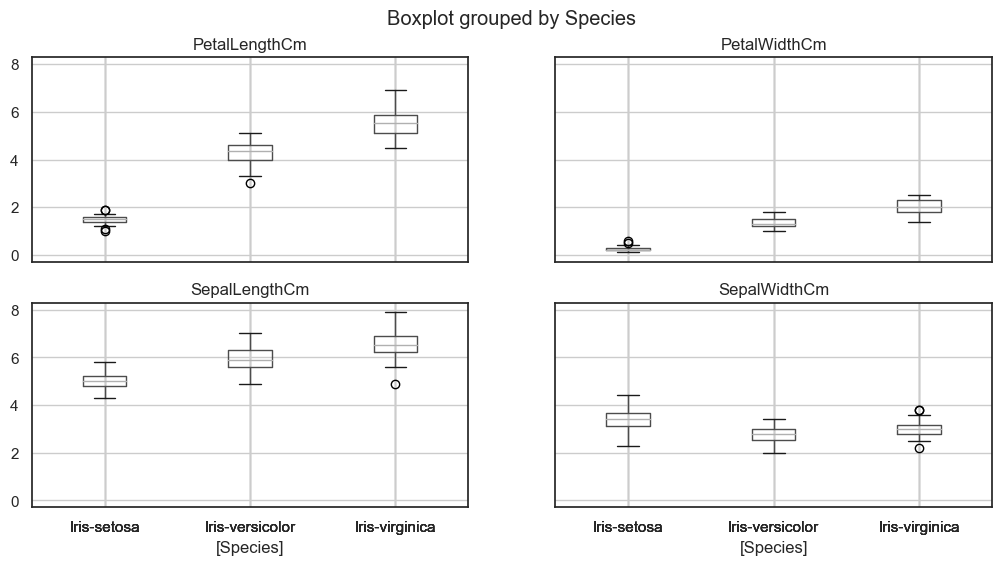

In [42]:
# box plot with pandas on each feature split out by species
iris.drop("Id", axis = 1).boxplot(by="Species", figsize=(12, 6))

<Axes: >

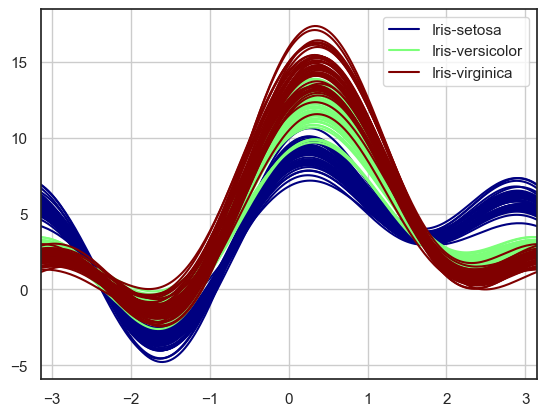

In [52]:
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting 
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species", colormap='jet')


<Axes: >

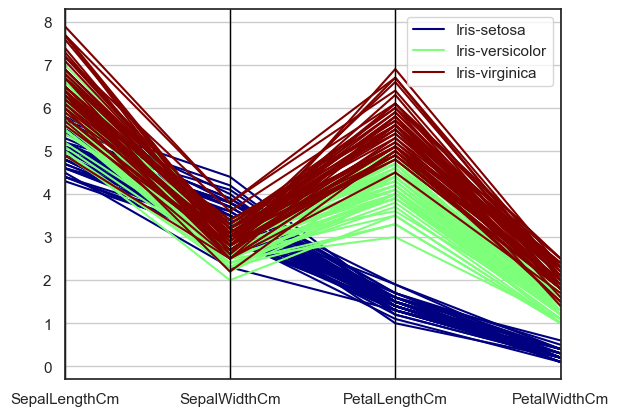

In [57]:
# Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species", colormap='jet')

<Axes: >

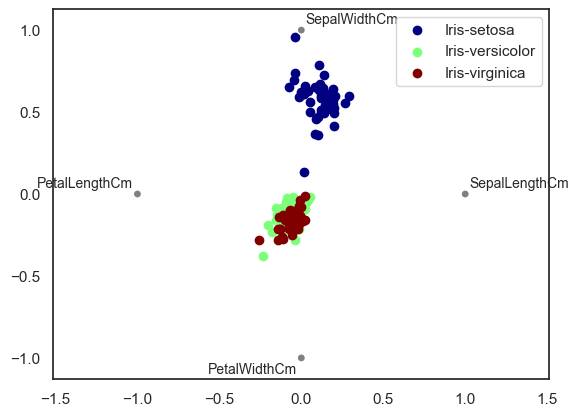

In [58]:
# RadViz puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species", colormap='jet')